In [1]:
using LinearAlgebra, Statistics, Plots

In [2]:
rand()

0.8969310832958637

In [3]:
rand(1)

1-element Vector{Float64}:
 0.1793680475146161

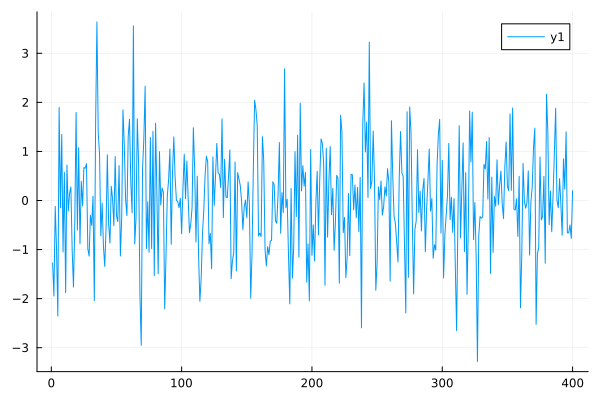

In [4]:
# Let us plot the white noise
using Plots

n = 400
ϵ = randn(400)
plot(1:n, ϵ)

### Exemple: Variation on Fixed Points

$f(v) := p + \beta v $ and $v^{n+1} = f(v)$

In [5]:
# poor style
p = 1.0 #  note 1.0 rather than 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_0 = 0.0 # initial condition

# setup the algorithm 
v_old = v_0
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + β*v_old
    normdiff = norm(v_new - v_old)
    
    # replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iteration")
    

Fixed point = 9.99999910185501, and |f(x) - x| = 9.979388870817729e-8 in 155 iteration


## Using a Package

In [6]:
#import Pkg; Pkg.add("NLsolve")
using NLsolve
using LinearAlgebra, Statistics, Plots

p = 1.0
β = 0.9
f(v) = p .+ β*v  # broadcast the +
sol = fixedpoint(f, [0.8]; m = 0)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
    "$(sol.iterations) iterations")


Fixed point = [9.999999909587816], and |f(x) - x| = 9.041219328764782e-9 in 176 iterations


### Exercise 1

In [7]:
function factorial2(n)
    if typeof(n) != Int64
        println(" $n is not an integer!")
    else
        fact = 1
        for i in 2:n
            fact *= i
        end
        return fact
    end
end
            

factorial2 (generic function with 1 method)

In [8]:
factorial2(5)

120

### Exercise 2

In [9]:
function binomial_rv(n,p)
    X = 0
    for i in 1:n
        X += (rand() < p)
    end
    return X
end
    

binomial_rv (generic function with 1 method)

In [10]:
binomial_rv(5,0.6)

4

In [11]:
pi

π = 3.1415926535897...

### Exercise 3

In [12]:
function approx_pi(n)
    π = 0
    for i in 1:n
        π += 4*(( (rand()-0.5)^2 + (rand()-0.5)^2 ) <= 0.25)/n
    end
    return π
end

approx_pi (generic function with 1 method)

In [13]:
approx_pi(1000)

3.1320000000000023

### Exercise 4

In [14]:
function coin_flip_game(n = 10)
    flips = rand(n).< 0.5
    win = false
    for i in 1:n-2
        if flips[i] *flips[i+1]*flips[i+2] == 1 
            win = true
            println("win!!!! you deserve 3 dollars")
            break
        end
    end
    if win == false
        println("Sorry! you lost")
    end
end
            
        
    
    

coin_flip_game (generic function with 2 methods)

In [19]:
coin_flip_game()

Sorry! you lost


### Exercise 5

In [38]:
using Distributions
using Plots
function plot_corr_time_series(α = 0.9, n = 200)
    X = zeros(n+1)
    # fill in X
    d = Normal()
    for i in 1:n
        X[i+1] = α*X[i] + rand(d, )
    end

plot!(X, title = "simulation of a correlated time series",
              lw = 2, xlabel = "t", ylabel = "X(t)", legend = :topleft)
end

plot_corr_time_series (generic function with 3 methods)

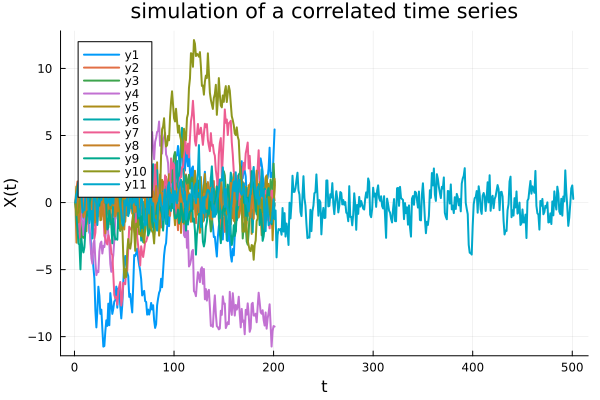

In [41]:
plot_corr_time_series(0.6, 500)

### Exercise 6

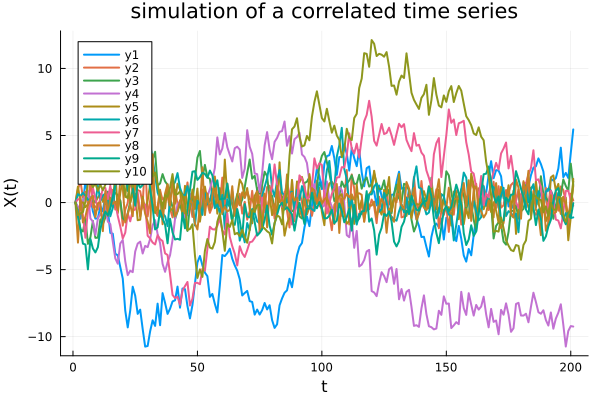

In [40]:
plot_corr_time_series(0)
plot_corr_time_series(0.8)
plot_corr_time_series(0.98)


### Exercise 7

In [47]:
function first_pass_time(x0, σ, α, t_max, a)
    
    X = zeros(t_max+1)
    T_a = 0
    # fill in X
    X[1] = x0
    X[t_max+1] = 0
    d = Normal()
    for i in 1: t_max-1
        if X[i] <= a
            T_a = i
            break
        end
        X[i+1] = α*X[i] + σ*rand(d, )
    end
    
    if T_a == 0
        if X[t_max] <= a
            T_a = t_max
        elseif X[t_max+1] <= a
            T_a = t_max+1
        else
            T_a = Inf
    end
    
    return T_a
end

first_pass_time (generic function with 2 methods)

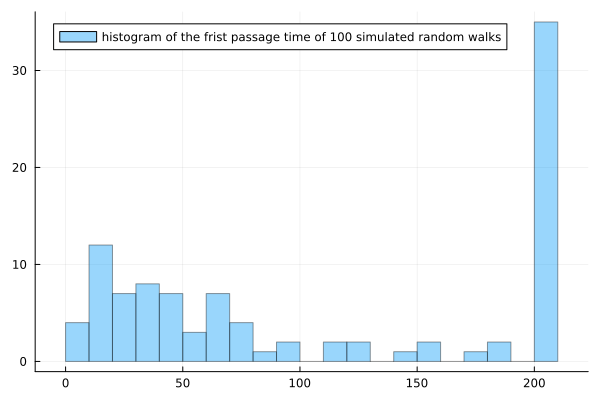

In [59]:
First_pass_time = [first_pass_time(1,0.2, 1.0, 200, 0) for i in 1:100]
histogram(First_pass_time, bins=20, alpha=0.4, label="histogram of the frist passage time of 100 simulated random walks")
